In [1]:
import numpy as np
import pandas as pd

In [2]:
# to convert into dataframes
import pandas as pd

# extract url response/info
from urllib.request import Request, urlopen

# to work with html content
from bs4 import BeautifulSoup 

In [3]:
# url = 'https://cricbuzz.com/live-cricket-scorecard/37617/kkr-vs-pbks-45th-match-indian-premier-league-2021'
# url = 'https://cricbuzz.com/live-cricket-scorecard/37617/ss'

url = 'https://cricbuzz.com/live-cricket-scorecard/37621/mi-vs-dc-46th-match-indian-premier-league-2021'

In [4]:
req = Request(url, headers = {'User-Agent': 'Mozilla/5.0'})
web_byte = urlopen(req).read()
webpage = web_byte.decode('utf-8')
soup = BeautifulSoup(webpage, "lxml")

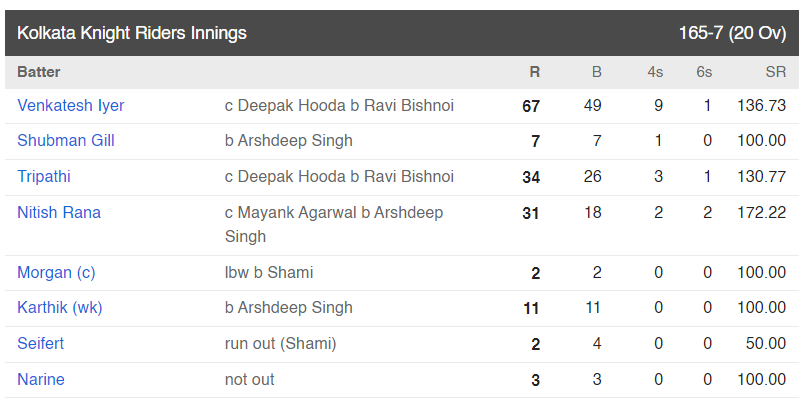

In [5]:
def fetch_firstinnings_batting_scorecard(soup):
    
    table_index = 0
    
    # get total rows count in the table
    rows_count = len(soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs={'class':'cb-col cb-col-8 text-right text-bold'}))

    # remove header count
    rows_count = rows_count - 1

    # create an empty dataframe
    df = pd.DataFrame(index=np.arange(rows_count), columns = ['batter', 'dismissal', 'runs', 'balls', 'fours','sixes', 'strikerate'])

    # fill the dataframe
    for i in range(len(df)):
        # player name
        player_name = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-27'})[0].get_text()
        df.batter[i] = player_name

        #dismissal info
        dismissal_info = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-33'})[0].get_text()
        df.dismissal[i] = dismissal_info

        # runs scored
        runs_scored = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right text-bold'})[0].get_text()
        df.runs[i] = runs_scored

        # balls faced
        balls_faced = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[0].get_text()
        df.balls[i] = balls_faced

        # 4s
        fours = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[1].get_text()
        df.fours[i] = fours

        # 6s
        sixes = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[2].get_text()
        df.sixes[i] = sixes

        # SR
        strikerate = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[3].get_text()
        df.strikerate[i] = strikerate

        # print(f"{player_name}: {dismissal_info},  {runs_scored} ({balls_faced})")
        
    return df

In [6]:
def fetch_secondinnings_batting_scorecard(soup):
    
    # get total rows count in the table
    rows_count = len(soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[3].findAll('div', attrs={'class':'cb-col cb-col-8 text-right text-bold'}))

    # remove header count
    rows_count = rows_count - 1

    # create an empty dataframe
    df = pd.DataFrame(index=np.arange(rows_count), columns = ['batter', 'dismissal', 'runs', 'balls', 'fours','sixes', 'strikerate'])

    # fill the dataframe
    table_index = 3
    for i in range(len(df)):
        # player name
        player_name = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-27'})[0].get_text()
        df.batter[i] = player_name

        #dismissal info
        dismissal_info = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-33'})[0].get_text()
        df.dismissal[i] = dismissal_info

        # runs scored
        runs_scored = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right text-bold'})[0].get_text()
        df.runs[i] = runs_scored

        # balls faced
        balls_faced = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[0].get_text()
        df.balls[i] = balls_faced

        # 4s
        fours = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[1].get_text()
        df.fours[i] = fours

        # 6s
        sixes = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[2].get_text()
        df.sixes[i] = sixes

        # SR
        strikerate = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[3].get_text()
        df.strikerate[i] = strikerate

        # print(f"{player_name}: {dismissal_info},  {runs_scored} ({balls_faced})")
        
    return df

In [7]:
def fetch_firstinnings_bowling_scorecard(soup):
    
    table_index = 1
    
    # get total rows count in the table
    rows_count = len(soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs={'class':'cb-col cb-col-8 text-right text-bold'}))

    # remove header count
    rows_count = rows_count - 1

    df = pd.DataFrame(index=np.arange(rows_count), columns = ['bowler', 'overs', 'maidens', 'runs', 'wickets','nb', 'wd', 'eco'])

    for i in range(len(df)):

        # bowler name
        bowler = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-40'})[0].get_text()
        df.bowler[i] = bowler

        # overs
        overs = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[0].get_text()
        df.overs[i] = overs

        # runs scored
        maidens = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[1].get_text()
        df.maidens[i] = maidens

        # balls faced
        runs = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-10 text-right'})[0].get_text()
        df.runs[i] = runs

        # wickets
        wickets = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right text-bold'})[0].get_text()
        df.wickets[i] = wickets

        # 6s
        nb = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[2].get_text()
        df.nb[i] = nb

    #     print(player_name, overs, maidens, runs, wickets, nb)

        # wide
        wd = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[3].get_text()
        df.wd[i] = wd

        # Eco
        eco = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-10 text-right'})[1].get_text()
        df.eco[i] = eco

#         print(f"{bowler}: {overs},  {maidens} ,{runs}")
        
    return df

In [8]:
def fetch_secondinnings_bowling_scorecard(soup):
    
    # get total rows count in the table
    rows_count = len(soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[1].findAll('div', attrs={'class':'cb-col cb-col-8 text-right text-bold'}))

    # remove header count
    rows_count = rows_count - 1

    df = pd.DataFrame(index=np.arange(rows_count), columns = ['bowler', 'overs', 'maidens', 'runs', 'wickets','nb', 'wd', 'eco'])


    table_index = 4

    for i in range(len(df)):

        # bowler name
        bowler = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-40'})[0].get_text()
        df.bowler[i] = bowler

        # overs
        overs = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[0].get_text()
        df.overs[i] = overs

        # runs scored
        maidens = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[1].get_text()
        df.maidens[i] = maidens

        # balls faced
        runs = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-10 text-right'})[0].get_text()
        df.runs[i] = runs

        # wickets
        wickets = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right text-bold'})[0].get_text()
        df.wickets[i] = wickets

        # 6s
        nb = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[2].get_text()
        df.nb[i] = nb

    #     print(player_name, overs, maidens, runs, wickets, nb)

        # wide
        wd = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-8 text-right'})[3].get_text()
        df.wd[i] = wd

        # Eco
        eco = soup.findAll('div', attrs={'class': 'cb-col cb-col-100 cb-ltst-wgt-hdr' })[table_index].findAll('div', attrs = {'class':'cb-col cb-col-100 cb-scrd-itms'})[i].findAll('div', attrs={'class':'cb-col cb-col-10 text-right'})[1].get_text()
        df.eco[i] = eco

#         print(f"{bowler}: {overs},  {maidens} ,{runs}")
    return df

In [9]:
fetch_firstinnings_batting_scorecard(soup)

,batter,dismissal,runs,balls,fours,sixes,strikerate
0,Rohit (c),c Rabada b Avesh Khan,7,10,1,0,70.00
1,de Kock (wk),c Nortje b Axar,19,18,1,1,105.56
2,Suryakumar Yadav,c Rabada b Axar,33,26,2,2,126.92
3,Saurabh Tiwary,c Pant b Axar,15,18,1,0,83.33
4,Pollard,b Nortje,6,9,0,0,66.67
5,Hardik Pandya,b Avesh Khan,17,18,2,0,94.44
6,Krunal Pandya,not out,13,15,1,1,86.67
7,Coulter-Nile,b Avesh Khan,1,2,0,0,50.00
8,Jayant Yadav,c Steven Smith b Ashwin,11,4,1,1,275.00
9,Bumrah,not out,1,1,0,0,100.00


In [10]:
fetch_secondinnings_batting_scorecard(soup)

,batter,dismissal,runs,balls,fours,sixes,strikerate
0,Prithvi Shaw,lbw b Krunal Pandya,6,7,1,0,85.71
1,Shikhar Dhawan,run out (Pollard),8,7,0,1,114.29
2,Steven Smith,b Coulter-Nile,9,8,0,1,112.50
3,Rishabh Pant (c & wk),c Hardik Pandya b Jayant Yadav,26,22,3,1,118.18
4,Shreyas Iyer,not out,33,33,2,0,100.00
5,Axar Patel,lbw b Boult,9,9,1,0,100.00
6,Shimron Hetmyer,c Rohit b Bumrah,15,8,2,0,187.50
7,Ravichandran Ashwin,not out,20,21,0,1,95.24


In [11]:
fetch_firstinnings_bowling_scorecard(soup)

,bowler,overs,maidens,runs,wickets,nb,wd,eco
0,Nortje,4,1,19,1,0,0,4.80
1,Avesh Khan,4,0,15,3,0,1,3.80
2,Ashwin,4,0,41,1,0,2,10.20
3,Rabada,4,0,33,0,1,1,8.20


In [12]:
fetch_secondinnings_bowling_scorecard(soup)

,bowler,overs,maidens,runs,wickets,nb,wd,eco
0,Trent Boult,4,0,24,1,0,1,6.00
1,Jayant Yadav,4,0,31,1,0,1,7.80
2,Krunal Pandya,2.1,0,18,1,0,0,8.30
3,Jasprit Bumrah,4,0,29,1,0,0,7.20
